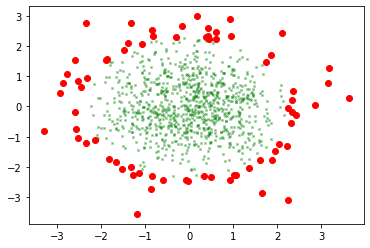

In [5]:
from sklearn.datasets import make_blobs
from sklearn import svm
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt

blobs = make_blobs(n_samples=1000, n_features=2, centers=1, cluster_std=1.5, shuffle=True, random_state=5)
normalized_data = preprocessing.StandardScaler().fit_transform(blobs[0])

out_fraction = 0.02
nu_estimate = 0.95 * out_fraction + 0.05
machine_learning = svm.OneClassSVM(kernel="rbf", degree=3, gamma=1.0 / len(normalized_data), nu=nu_estimate)
machine_learning.fit(normalized_data)
detection = machine_learning.predict(normalized_data)
outliers = np.where(detection == -1)
regular = np.where(detection == 1)

a = plt.plot(normalized_data[regular, 0], normalized_data[regular, 1], 'x', markersize=2, color="green", alpha=0.6)
b = plt.plot(normalized_data[outliers, 0], normalized_data[outliers, 1], 'o', color='red', markersize=6)
